# Choosing the right estimator/algorithm

Selecting the right algorithm in machine learning is crucial. There's no one-size-fits-all solution, as different algorithms excel at various tasks. Understanding the nature of the available data, the problem to be solved, and the project's constraints is key. Thy chosen estimator should align with the data type available in the dataset, be it numerical or text, and the problem type. By picking the right tool, you can achieve better accuracy, efficiency, and interpretability in the final machine learning model.

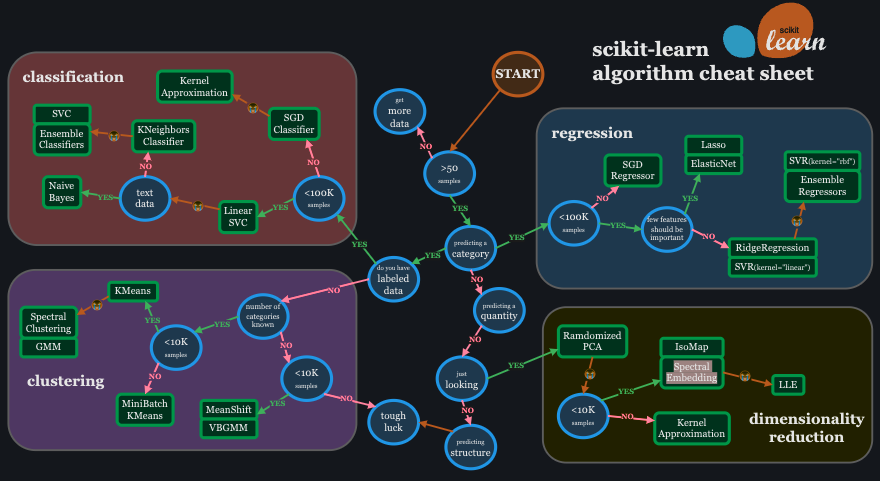

- [Picking a machine learning model for a Regression problem](#picking-a-machine-learning-model-for-a-regression-problem)
  - [Creating simple Regression models](#creating-simple-regression-models)
- [Picking a machine learning model for a Classification problem](#picking-machine-learning-model-for-classification-problem)
  - [Creating simple Classification models](#creating-simple-classification-models)

Things to note

- sklearn refers to machine learning models, algorithms as estimators
- Classification problem - predicting a category (heart disease or not)
  - Sometimes you'll see `clf` (short for classifier used as a classification estimator)
- Regression Problem - predicting a number (selling price of a car)
- If you have structured data, use ensemble methods
- If you have unstructured data, use deep learning or transfer learning


In [1]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Picking a machine learning model for a Regression problem

Use the California Housing dataset


In [2]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
# Turning dataset into a DataFrame
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Adding target
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Creating simple Regression models


In [5]:
# Creating data

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']  # Median house price in $100,000s

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Creating model using RidgeRegression
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5758549611440126

In [7]:
# Creating model using Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8059809073051385

In [8]:
# Creating model using ElasticNet
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.416551890980282

In [9]:
# Creating model using Lasso
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.28416718210084113

In [10]:
# Creating model using SVR
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

model.score(X_test, y_test)

-0.01648536010717261

In [11]:
# Creating model using SVR
from sklearn.svm import LinearSVR

model = LinearSVR()
model.fit(X_train, y_train)

model.score(X_test, y_test)

/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.2728423585244506

## Picking machine learning model for Classification problem


In [12]:
# Getting dataset
heart_disease = pd.read_csv('../datasets/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# Separating data

# Setting seed
np.random.seed(42)

# Creating X/y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creating simple Classification models


In [24]:
# Creating linear SVC model
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/figredos/Developer/data_science/scikitlearn/.env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [16]:
# Creating KNeighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6885245901639344

In [32]:
# Creating RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8688524590163934

In [18]:
# Creating Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7704918032786885

In [19]:
# Creating SVC model
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7049180327868853